In [1]:
# Importing all the necessary libraries which is used in this report
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import normaltest
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
import math
import warnings
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from scipy.stats import ttest_ind
from scipy.stats import pearsonr, PermutationMethod, normaltest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Python version: {sys.version}")



warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 70)
%matplotlib inline

Pandas version: 2.2.2
Numpy version: 1.26.4
Matplotlib version: 3.9.2
Seaborn version: 0.13.2
Python version: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


In [2]:
# load the data
def read_data(name_dir):
  assessments=pd.read_csv(f"{name_dir}/assessments.csv")
  courses=pd.read_csv(f"{name_dir}/courses.csv")
  studentRegistration=pd.read_csv(f"{name_dir}/studentRegistration.csv")
  studentvle=pd.read_csv(f"{name_dir}/studentVle.csv")
  vle=pd.read_csv(f"{name_dir}/vle.csv")
  studentAssesment=pd.read_csv(f"{name_dir}/studentAssessment.csv") 
  studentinfo=pd.read_csv(f"{name_dir}/studentinfo.csv")
  return assessments,courses,studentRegistration,studentvle,vle,studentAssesment,studentinfo

name_dir="OULAD"
assessments, courses,studentRegistration,studentvle,vle,studentAssesment,studentinfo = read_data(name_dir)

In [5]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19,10.0
1,AAA,2013J,1753,TMA,54,20.0
2,AAA,2013J,1754,TMA,117,20.0
3,AAA,2013J,1755,TMA,166,20.0
4,AAA,2013J,1756,TMA,215,30.0


In [7]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [9]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,?
1,AAA,2013J,28400,-53,?
2,AAA,2013J,30268,-92,12
3,AAA,2013J,31604,-52,?
4,AAA,2013J,32885,-176,?


In [11]:
studentvle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [13]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,?,?
1,546712,AAA,2013J,oucontent,?,?
2,546998,AAA,2013J,resource,?,?
3,546888,AAA,2013J,url,?,?
4,547035,AAA,2013J,resource,?,?


In [15]:
studentAssesment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79


In [17]:
studentinfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [19]:
# Function to display an overview of datasets
def dataset_overview(datasets):
    for name, df in datasets.items():
        print(f"Dataset: {name}")
        print(f"Shape: {df.shape}")
        print("Columns:")
        print(df.info())
        print("\nBasic Statistics:")
        print(df.describe(include='all'))
        print("-" * 50)

# Overview of all datasets
dataset_overview({
    "assessments": assessments,
    "courses": courses,
    "student_registration": studentRegistration,
    "student_vle": studentvle,
    "vle": vle,
    "student_assessment": studentAssesment,
    "student_info": studentinfo
})

Dataset: assessments
Shape: (206, 6)
Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               206 non-null    object 
 5   weight             206 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 9.8+ KB
None

Basic Statistics:
       code_module code_presentation  id_assessment assessment_type date  \
count          206               206     206.000000             206  206   
unique           7                 4            NaN               3   75   
top            FFF             2014J            NaN             TMA  222   
freq            52                57            NaN             106   15   


# Data Cleaning and Wrangling

In [21]:
#clear all non numeric value from respective columns
nan_date=(assessments['date']=='?').sum()
display("Null values in Date Column:",nan_date)

nan_score=(studentAssesment['score']=='?').sum()
display("Null vlaues in Score Column:",nan_score)

# Replacing ? with 0
assessments.replace('?', 0, inplace=True)
studentAssesment.replace('?', 0, inplace=True)

nan_date=(assessments['date']=='?').sum()
display("Null values in Date Column:",nan_date)

nan_score=(studentAssesment['score']=='?').sum()
display("Null vlaues in Score Column:",nan_score)

nan_registration = (studentRegistration == '?').sum()  # Count '?' values in the entire dataset
print("Null values ('?') in Student Registration Dataset:", nan_registration)

# Replace '?' with NaN 
studentRegistration.replace('?', pd.NA, inplace=True)

nan_registration_after = (studentRegistration == '?').sum()
print("Null values ('?') in Student Registration Dataset after replacement:",nan_registration_after)

nan_vle = (vle== '?').sum().sum()  # Count '?' values in the entire dataset
print("Null values ('?') in VLE Dataset:",nan_vle)

# Replace '?' with NaN in vle
vle.replace('?', pd.NA, inplace=True)
            
nan_vle_after = (vle == '?').sum()
print("Null values ('?') in VLE Dataset after replacement:",nan_vle_after)

nan_info = (studentinfo== '?').sum() # Count '?' values in the entire dataset
print("Null values ('?') in Student Info Dataset:",nan_info)

# Replace '?' with 0 
studentinfo.replace('?', 0, inplace=True)

nan_info_after = (studentinfo== '?').sum()
print("Null values ('?') in Student Info Dataset after replacement:",nan_info_after)


'Null values in Date Column:'

11

'Null vlaues in Score Column:'

173

'Null values in Date Column:'

0

'Null vlaues in Score Column:'

0

Null values ('?') in Student Registration Dataset: code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64
Null values ('?') in Student Registration Dataset after replacement: code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64
Null values ('?') in VLE Dataset: 10486
Null values ('?') in VLE Dataset after replacement: id_site              0
code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64
Null values ('?') in Student Info Dataset: code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disabili

# Merging data

In [23]:
studentData = pd.merge(studentRegistration, studentinfo, on=['id_student', 'code_module', 'code_presentation'], how='inner')

In [25]:
studentData = pd.merge(studentData, courses, on=['code_module', 'code_presentation'], how='inner')

In [27]:
studentAssesment.shape

(173912, 5)

In [29]:
assessments.shape

(206, 6)

In [31]:
studentAssesment_data = assessments.merge(studentAssesment,on=['id_assessment'],how="inner")

In [33]:
studentAssesment_data

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19,10.0,11391,18,0,78
1,AAA,2013J,1752,TMA,19,10.0,28400,22,0,70
2,AAA,2013J,1752,TMA,19,10.0,31604,17,0,72
3,AAA,2013J,1752,TMA,19,10.0,32885,26,0,69
4,AAA,2013J,1752,TMA,19,10.0,38053,19,0,79
...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37437,TMA,173,0.0,652462,172,0,60
173908,GGG,2014J,37437,TMA,173,0.0,652539,176,0,75
173909,GGG,2014J,37437,TMA,173,0.0,653157,187,0,70
173910,GGG,2014J,37437,TMA,173,0.0,653252,171,0,70


In [35]:
print(studentAssesment_data.weight.max())
print(studentAssesment_data.weight.min())

100.0
0.0


In [37]:
studentAssesment_data.isna().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
id_student           0
date_submitted       0
is_banked            0
score                0
dtype: int64

Merging the assessment data with the student data will expand the studentAssesment_data because each student can have multiple assessments. This results in a larger dataset where each row now reflects a unique student-assessment combination, with additional columns detailing the assessment information. While this significantly increases the number of rows, we will address the handling of this larger dataset later. For now, let's focus on combining all the data into a single comprehensive dataset

In [39]:
merged_student_data = studentAssesment_data.merge(studentData,on=['code_module','code_presentation','id_student'],how="inner")

In [41]:
merged_student_data

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,date_registration,date_unregistration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length
0,AAA,2013J,1752,TMA,19,10.0,11391,18,0,78,-159,<NA>,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268
1,AAA,2013J,1752,TMA,19,10.0,28400,22,0,70,-53,<NA>,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,268
2,AAA,2013J,1752,TMA,19,10.0,31604,17,0,72,-52,<NA>,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,268
3,AAA,2013J,1752,TMA,19,10.0,32885,26,0,69,-176,<NA>,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,268
4,AAA,2013J,1752,TMA,19,10.0,38053,19,0,79,-110,<NA>,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37437,TMA,173,0.0,652462,172,0,60,-115,<NA>,M,South Region,Lower Than A Level,90-100%,35-55,0,30,N,Pass,269
173908,GGG,2014J,37437,TMA,173,0.0,652539,176,0,75,-85,<NA>,F,South Region,A Level or Equivalent,70-80%,0-35,0,30,N,Pass,269
173909,GGG,2014J,37437,TMA,173,0.0,653157,187,0,70,-46,<NA>,F,West Midlands Region,Lower Than A Level,20-30%,0-35,0,30,N,Pass,269
173910,GGG,2014J,37437,TMA,173,0.0,653252,171,0,70,-78,<NA>,F,East Anglian Region,No Formal quals,20-30%,0-35,0,30,Y,Pass,269


In [43]:
merged_student_data.isna().sum()

code_module                   0
code_presentation             0
id_assessment                 0
assessment_type               0
date                          0
                             ..
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
module_presentation_length    0
Length: 22, dtype: int64

In [45]:
data_df = merged_student_data.copy()

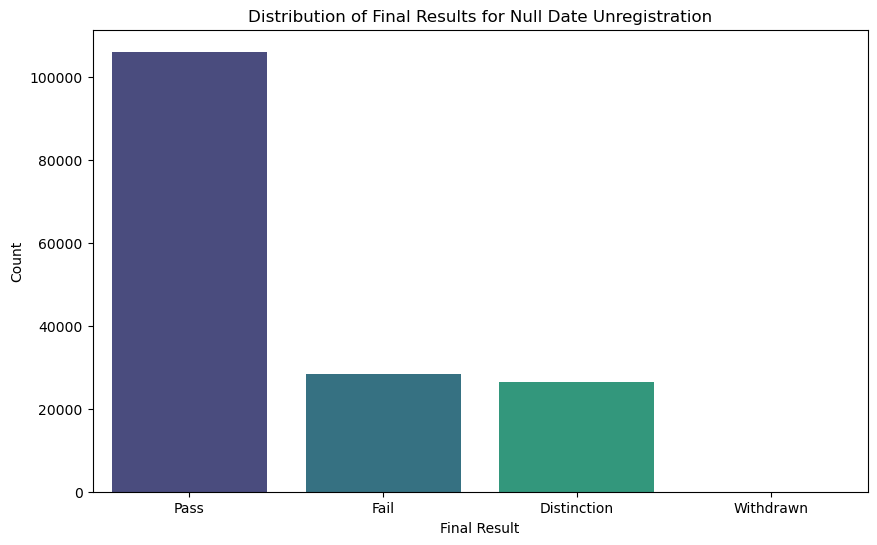

In [47]:
null_unregistration = data_df[data_df['date_unregistration'].isnull()]

plt.figure(figsize=(10, 6))
sns.countplot(data=null_unregistration, x='final_result', palette='viridis')

plt.title('Distribution of Final Results for Null Date Unregistration')
plt.xlabel('Final Result')
plt.ylabel('Count')

plt.show()


date_Unregisteration descripes the date when the student unregisters from the moudle, Pass and Fail and Distinction means that a student finished the module, while withdrawn means that he didn't finish it

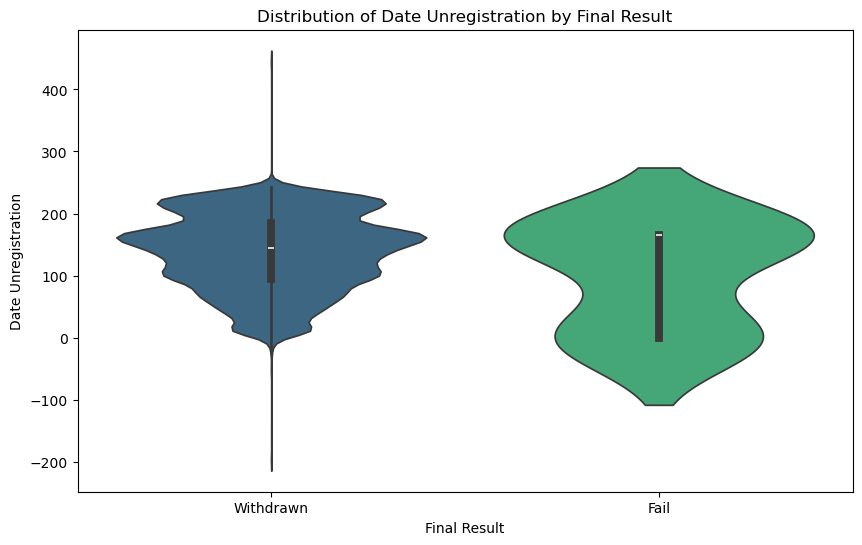

In [49]:
# Filter for non-null unregistration dates
non_null_unregistration = data_df[data_df['date_unregistration'].notnull()]

# Ensure 'date_unregistration' is numeric for plotting
non_null_unregistration['date_unregistration'] = pd.to_numeric(non_null_unregistration['date_unregistration'], errors='coerce')

# Plot violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=non_null_unregistration, x='final_result', y='date_unregistration', palette='viridis')

plt.title('Distribution of Date Unregistration by Final Result')
plt.xlabel('Final Result')
plt.ylabel('Date Unregistration')

# Show the plot
plt.show()


Since we can't Impute all of these null values, and we know that date_unregistered is null when a student doesn't complete his study, we can assign finished-unfinished label instead of date_unregisteration, if the final result is (Pass,Fail,Distinction) a student finished, if it's (Withdrawn) student didn't finish

In [51]:
data_df['study_status'] = data_df['final_result'].apply(lambda x: 'finished' if x in ['Pass', 'Fail', 'Distinction'] else 'unfinished')

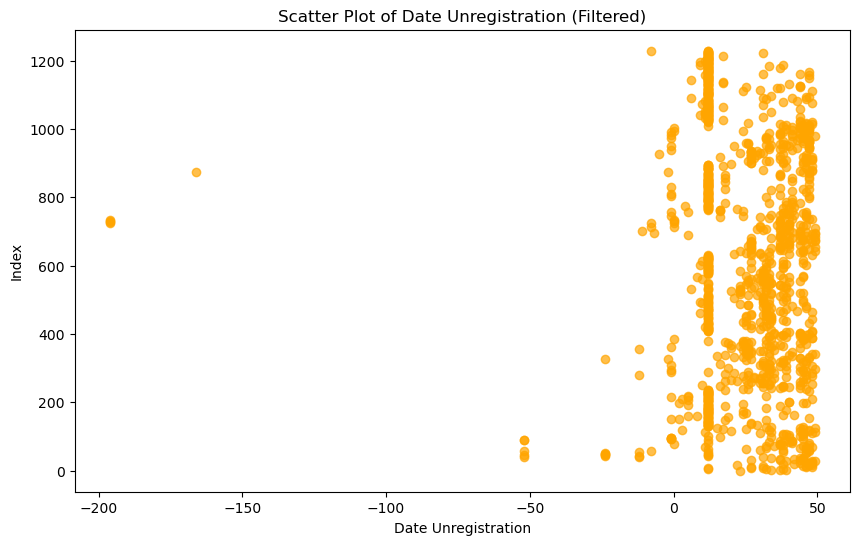

In [53]:
# Filter for rows where 'date_unregistration' is not null
df_non_null = data_df[data_df['date_unregistration'].notnull()]

df_non_null['date_unregistration'] = pd.to_numeric(df_non_null['date_unregistration'], errors='coerce')

df_filtered = df_non_null[df_non_null['date_unregistration'] < 50]  # Adjust the threshold as needed

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['date_unregistration'], range(len(df_filtered)), alpha=0.7, color='orange')
plt.title('Scatter Plot of Date Unregistration (Filtered)')
plt.xlabel('Date Unregistration')
plt.ylabel('Index')
plt.show()


In [55]:
data_df.isna().sum()

code_module                   0
code_presentation             0
id_assessment                 0
assessment_type               0
date                          0
                             ..
studied_credits               0
disability                    0
final_result                  0
module_presentation_length    0
study_status                  0
Length: 23, dtype: int64

In [57]:
# Ensure 'date_unregistration' is numeric
data_df['date_unregistration'] = pd.to_numeric(data_df['date_unregistration'], errors='coerce')

# Define the categorization function
def categorize_withdrawal(date):
    if pd.isnull(date):
        return "didn't withdraw"
    elif date < 0:
        return 'early withdrawal'
    elif date >= 0 and date < 70:
        return 'normal withdrawal'
    else:
        return 'late withdrawal'

# Apply the function to categorize withdrawal status
data_df['withdrawal_status'] = data_df['date_unregistration'].apply(categorize_withdrawal)

In [59]:
data_df.drop(['date_unregistration'],axis=1,inplace=True) # dropping the column as it has many nulls and we already extracted useful information from it

In [61]:
data_df.isna().sum()

code_module                   0
code_presentation             0
id_assessment                 0
assessment_type               0
date                          0
                             ..
disability                    0
final_result                  0
module_presentation_length    0
study_status                  0
withdrawal_status             0
Length: 23, dtype: int64

In [63]:
regions_list = data_df[data_df['imd_band'].isnull()]['region'].unique()

for region in regions_list:
  mode_imd_band = data_df[data_df['region'] == region]['imd_band'].mode()[0]
  data_df.loc[(data_df['imd_band'].isnull()) & (data_df['region'] == region), 'imd_band'] = mode_imd_band

In [65]:
data_df.isna().sum() # Only 7 records left in date_registeration
data_df.dropna(inplace=True)

# Merging of vle and student vle 

Merging the studentVLE data with the VLE data will result in a significant expansion, similar to the previous merges. This is because each student interaction with online learning materials (tracked in studentVLE) is paired with the corresponding material details from VLE. Given that the studentVLE dataset contains over 10 million records, this merge will lead to a very large number of rows. However, we plan to reduce this later using grouping techniques to aggregate and condense the data, making it more manageable. For now, let's proceed with the merge, knowing we'll optimize the dataset afterward.

In [67]:
student_vle_interaction = studentvle.merge(vle,on=['code_module','code_presentation','id_site'],how="inner")

In [68]:
student_vle_interaction

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,week_from,week_to
0,AAA,2013J,28400,546652,-10,4,forumng,<NA>,<NA>
1,AAA,2013J,28400,546652,-10,1,forumng,<NA>,<NA>
2,AAA,2013J,28400,546652,-10,1,forumng,<NA>,<NA>
3,AAA,2013J,28400,546614,-10,11,homepage,<NA>,<NA>
4,AAA,2013J,28400,546714,-10,1,oucontent,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3,homepage,<NA>,<NA>
10655276,GGG,2014J,675578,896943,269,1,homepage,<NA>,<NA>
10655277,GGG,2014J,654064,896943,269,3,homepage,<NA>,<NA>
10655278,GGG,2014J,654064,896939,269,1,forumng,<NA>,<NA>


In [69]:
grouped_student_vle_interaction = student_vle_interaction.groupby(
    ['id_student', 'code_module', 'code_presentation','activity_type'], as_index=False
)["sum_click"].agg(['sum', 'count'])

In [70]:
grouped_student_vle_interaction

,id_student,code_module,code_presentation,activity_type,sum,count
0,6516,AAA,2014J,dataplus,21,4
1,6516,AAA,2014J,forumng,451,175
2,6516,AAA,2014J,homepage,497,158
3,6516,AAA,2014J,oucontent,1505,184
4,6516,AAA,2014J,resource,31,19
...,...,...,...,...,...,...
240352,2698588,BBB,2014J,oucollaborate,7,7
240353,2698588,BBB,2014J,oucontent,233,74
240354,2698588,BBB,2014J,resource,49,36
240355,2698588,BBB,2014J,subpage,76,34


In [75]:
merged_data = grouped_student_vle_interaction.merge(data_df,on=['id_student', 'code_module', 'code_presentation'],how='inner')

In [77]:
merged_data = merged_data.drop(['assessment_type', 'activity_type'], axis=1)

In [82]:
merged_data[:1000].to_csv(r'C:\Users\LENOVO\Downloads\OULAD (1)\OULAD\merged_df.csv',index=False)

In [84]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603410 entries, 0 to 1603409
Data columns (total 24 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id_student                  1603410 non-null  int64  
 1   code_module                 1603410 non-null  object 
 2   code_presentation           1603410 non-null  object 
 3   sum                         1603410 non-null  int64  
 4   count                       1603410 non-null  int64  
 5   id_assessment               1603410 non-null  int64  
 6   date                        1603410 non-null  object 
 7   weight                      1603410 non-null  float64
 8   date_submitted              1603410 non-null  int64  
 9   is_banked                   1603410 non-null  int64  
 10  score                       1603410 non-null  object 
 11  date_registration           1603410 non-null  object 
 12  gender                      1603410 non-null  object 
 1

In [86]:
merged_data.isna().sum()
merged_data.dropna(inplace=True)

In [88]:
merged_data.isna().sum()

id_student                    0
code_module                   0
code_presentation             0
sum                           0
count                         0
                             ..
disability                    0
final_result                  0
module_presentation_length    0
study_status                  0
withdrawal_status             0
Length: 24, dtype: int64

# Exploratory Data Analysis

# Top 5 Modules Chosen by Students

Top 5 Modules Chosen by Students:
code_module
FFF    6057
BBB    5943
DDD    4694
CCC    3317
EEE    2268
Name: id_student, dtype: int64


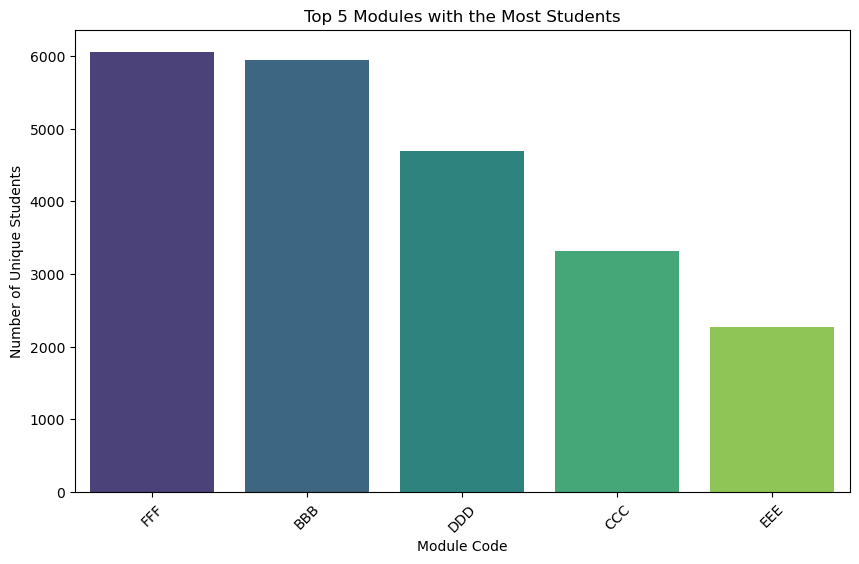

In [90]:
student_count_per_module = merged_data.groupby('code_module')['id_student'].nunique()

top_5_modules = student_count_per_module.sort_values(ascending=False).head(5)

print("Top 5 Modules Chosen by Students:")
print(top_5_modules)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_modules.index, y=top_5_modules.values, palette='viridis')

plt.title('Top 5 Modules with the Most Students')
plt.xlabel('Module Code')
plt.ylabel('Number of Unique Students')
plt.xticks(rotation=45)
plt.show()


# Top 5 Modules with the Highest Average Score

Top 5 Modules with the Highest Average Score:
code_module
EEE    81.438758
GGG    79.942976
FFF    78.299933
BBB    76.810654
CCC    73.981282
Name: score, dtype: float64


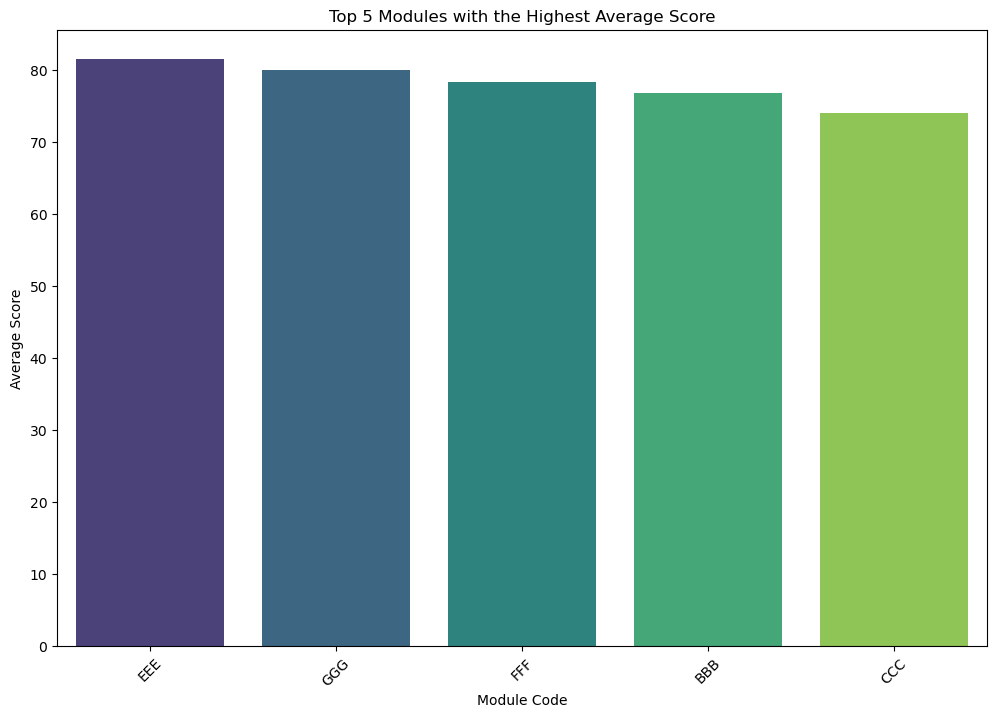

In [92]:
merged_data['score'] = pd.to_numeric(merged_data['score'], errors='coerce')

average_score_per_module = merged_data.groupby('code_module')['score'].mean()

top_5_highest_avg_score_modules = average_score_per_module.sort_values(ascending=False).head(5)

print("Top 5 Modules with the Highest Average Score:")
print(top_5_highest_avg_score_modules)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_5_highest_avg_score_modules.index, y=top_5_highest_avg_score_modules.values, palette='viridis')

plt.title('Top 5 Modules with the Highest Average Score')
plt.xlabel('Module Code')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


# The top 5 modules with the lowest average score

Top 5 Modules with the Lowest Average Score:
code_module
AAA    69.441568
DDD    70.392965
CCC    73.981282
BBB    76.810654
FFF    78.299933
Name: score, dtype: float64


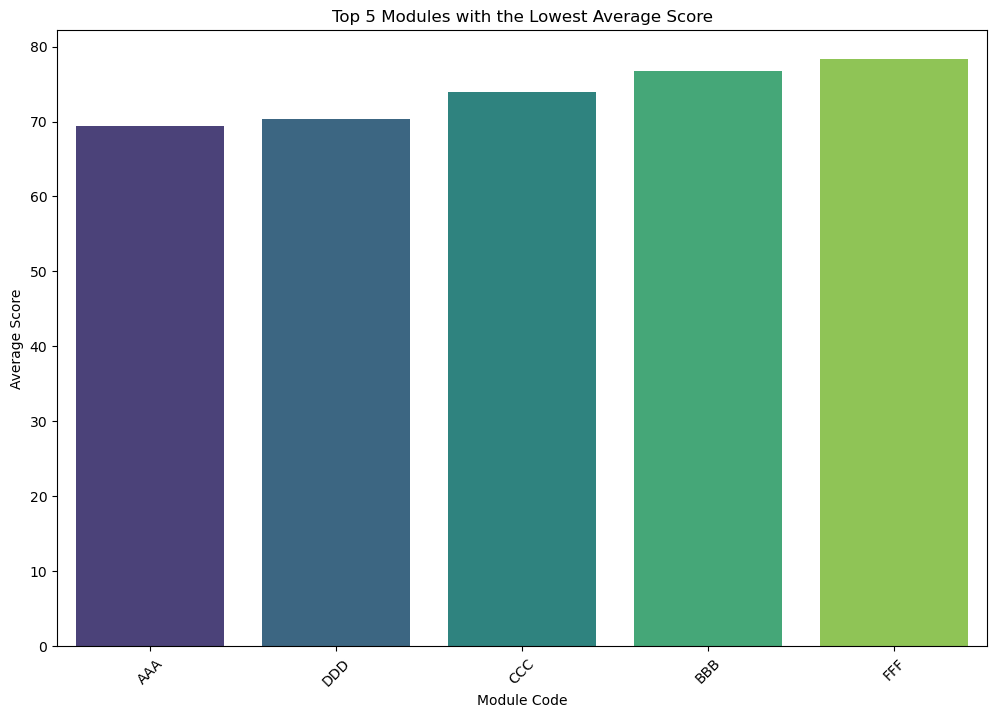

In [94]:
merged_data['score'] = pd.to_numeric(merged_data['score'], errors='coerce')
average_score_per_module = merged_data.groupby('code_module')['score'].mean()

top_5_lowest_avg_score_modules = average_score_per_module.sort_values(ascending=True).head(5)

print("Top 5 Modules with the Lowest Average Score:")
print(top_5_lowest_avg_score_modules)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_5_lowest_avg_score_modules.index, y=top_5_lowest_avg_score_modules.values, palette='viridis')

plt.title('Top 5 Modules with the Lowest Average Score')
plt.xlabel('Module Code')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


# The top 5 modules with the most number of fails

Top 5 Modules with the Most Number of Fails:
code_module
FFF    1461
BBB    1423
DDD    1173
CCC     670
GGG     485
Name: id_student, dtype: int64


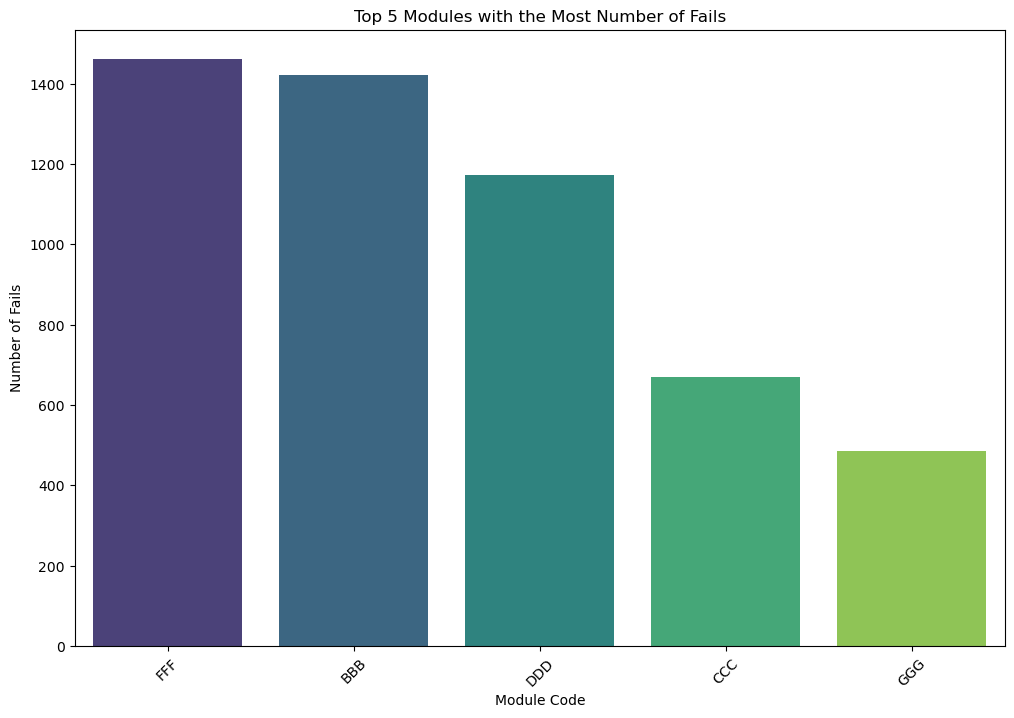

In [96]:
failed_students = merged_data[merged_data['final_result'] == 'Fail']

fails_per_module = failed_students.groupby('code_module')['id_student'].nunique()

top_5_modules_with_most_fails = fails_per_module.sort_values(ascending=False).head(5)

print("Top 5 Modules with the Most Number of Fails:")
print(top_5_modules_with_most_fails)

# Plot the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x=top_5_modules_with_most_fails.index, y=top_5_modules_with_most_fails.values, palette='viridis')

plt.title('Top 5 Modules with the Most Number of Fails')
plt.xlabel('Module Code')
plt.ylabel('Number of Fails')
plt.xticks(rotation=45)
plt.show()

# The age distribution of the students

Age Distribution of Unique Students:
age_band
0-35     16168
35-55     7064
55<=       162
Name: id_student, dtype: int64


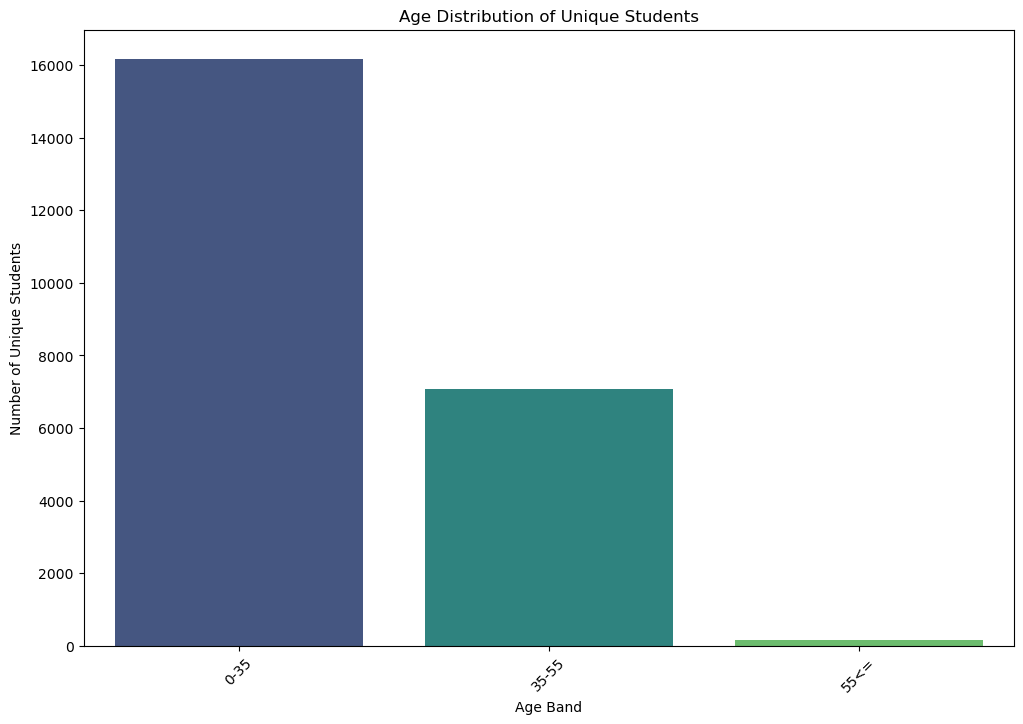

In [98]:
# Group by 'age_band' and count the number of unique students
unique_students_per_age_band = merged_data.groupby('age_band')['id_student'].nunique()

# Display the age distribution
print("Age Distribution of Unique Students:")
print(unique_students_per_age_band)

# Plot the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x=unique_students_per_age_band.index, y=unique_students_per_age_band.values, palette='viridis')

plt.title('Age Distribution of Unique Students')
plt.xlabel('Age Band')
plt.ylabel('Number of Unique Students')
plt.xticks(rotation=45)
plt.show()


# The weekly activity patterns of the students' interaction with the VLE

Weekly Activity Patterns:
week
-4       43298
-3      433407
-2      646001
-1     1025241
 0     2013077
        ...   
 34     525560
 35      54192
 36      31014
 37      22657
 38       8171
Name: sum_click, Length: 43, dtype: int64


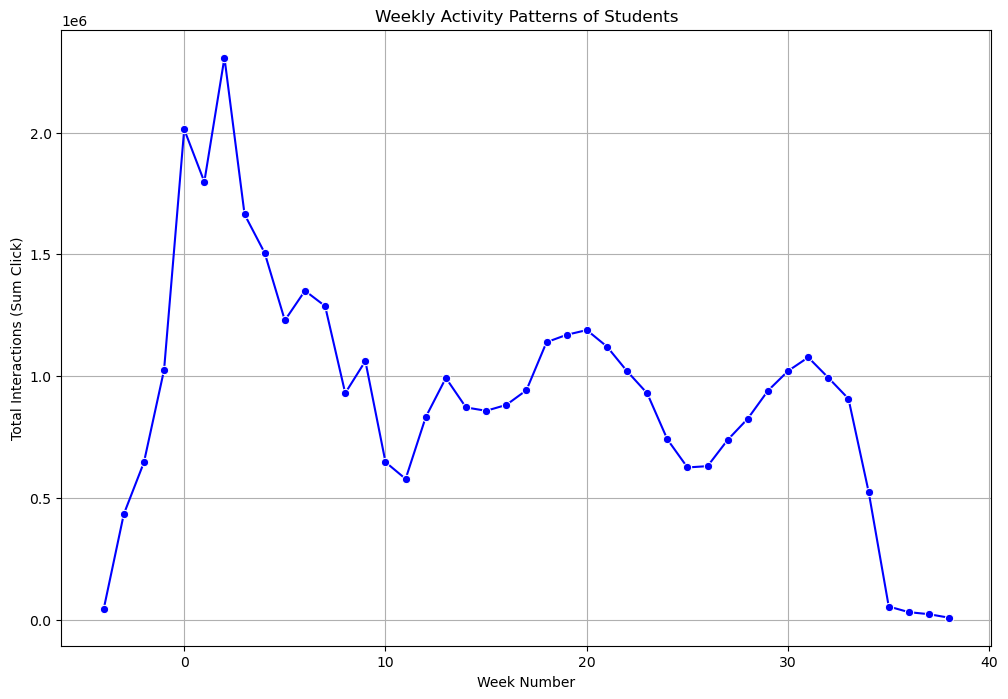

In [100]:
if 'date' in merged_data.columns and 'sum' in merged_data.columns:
    
    studentvle['week'] = studentvle['date'] // 7
    
    weekly_activity = studentvle.groupby('week')['sum_click'].sum()

    print("Weekly Activity Patterns:")
    print(weekly_activity)
    
    plt.figure(figsize=(12, 8))
    sns.lineplot(x=weekly_activity.index, y=weekly_activity.values, marker='o', color='blue')

    plt.title('Weekly Activity Patterns of Students')
    plt.xlabel('Week Number')
    plt.ylabel('Total Interactions (Sum Click)')
    plt.grid()
    plt.show()
else:
    print("The required columns ('date', 'sum_click') are not present in the student_vle dataset.")


# Hypothesis testing

In [102]:
# start with Hypothesis testing
merged_data['sum'] = pd.to_numeric(merged_data['sum'], errors='coerce')
merged_data['score'] = pd.to_numeric(merged_data['score'], errors='coerce')

cleaned_data = merged_data.dropna(subset=['sum', 'score'])

median_sum = cleaned_data['sum'].median()
low_interaction = cleaned_data[cleaned_data['sum'] <= median_sum]['score']
high_interaction = cleaned_data[cleaned_data['sum'] > median_sum]['score']

t_stat, p_value = stats.ttest_ind(low_interaction, high_interaction, equal_var=False)

print(f"T-statistic: {t_stat:.4e}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in mean scores between the two groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean scores between the two groups.")



T-statistic: -4.7535e+01
P-value: 0.0000e+00
Reject the null hypothesis: There is a significant difference in mean scores between the two groups.


# Decision tree

In [112]:
# Selecting predictors
X = merged_data[['code_module', 'code_presentation', 'sum', 'score', 'weight', 'gender',
       'region', 'highest_education', 'imd_band', 'age_band']]
y = merged_data['final_result']

In [114]:
X_dummies = pd.get_dummies(X, columns=['code_presentation', 'code_module','gender', 'age_band', 'region', 'imd_band'], drop_first=True)

y_encoded = y.map({'Pass': 0, 'Fail': 1, 'Distinction': 2})


# Handle any remaining missing values
X_dummies = X_dummies.fillna(0)  # Replace NaNs in predictors with 0
y_encoded = y_encoded.dropna()  # Drop rows with missing target values

# Align X_dummies and y_encoded to ensure they have the same index
X_dummies = X_dummies.loc[y_encoded.index]


In [116]:

# Selecting predictors
X = merged_data[['code_module', 'code_presentation', 'sum', 'score', 'weight', 'gender',
                 'region', 'highest_education', 'imd_band', 'age_band']]
y = merged_data['final_result']

# Encode categorical columns using pd.get_dummies
X_dummies = pd.get_dummies(
    X,
    columns=['code_presentation', 'code_module', 'gender', 'age_band', 
             'region', 'highest_education', 'imd_band'],
    drop_first=True
)

# Encode the target variable y (if categorical)
y_encoded = y.map({'Pass': 0, 'Fail': 1, 'Distinction': 2,'Withdrawn': 3})

# Handle missing values (e.g., NaNs)
X_dummies = X_dummies.fillna(0)  # Replace NaNs in predictors with 0
y_encoded = y_encoded.dropna()  # Drop rows with missing target values

# Align indices of X_dummies and y_encoded
X_dummies = X_dummies.loc[y_encoded.index]

# Decision Tree Classifier for feature selection
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=clf, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_dummies, y_encoded)

# Extract selected features
selected_features = X_dummies.columns[rfe.support_]

# Create a new DataFrame with only the selected features
X_selected = X_dummies[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)


In [117]:
# Training classifier
clf.fit(X_train, y_train)

# Predicting target
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}\n")

# Classification report with all classes
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Fail', 'Pass', 'Distinction', 'Withdrawn']))


Model Accuracy: 0.64

Classification Report:
              precision    recall  f1-score   support

        Fail       0.64      0.97      0.78    200307
        Pass       0.47      0.11      0.18     47888
 Distinction       0.67      0.08      0.15     51087
   Withdrawn       0.00      0.00      0.00     21400

    accuracy                           0.64    320682
   macro avg       0.45      0.29      0.28    320682
weighted avg       0.58      0.64      0.53    320682



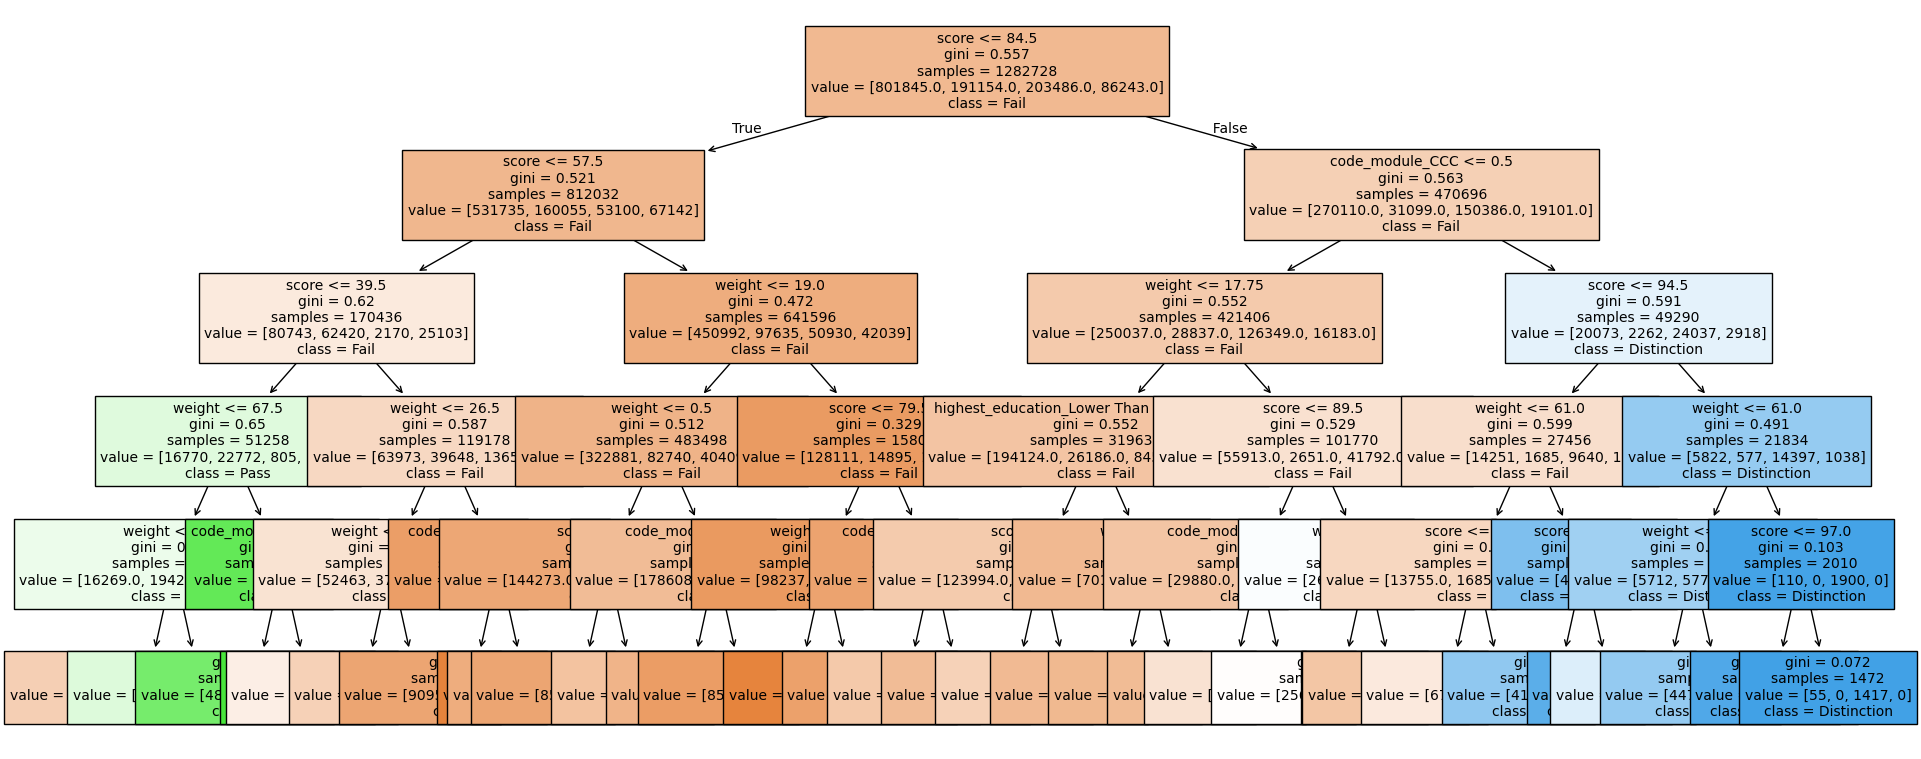

In [124]:
# Plotting the decision tree

# Plotting the decision tree
fig, ax = plt.subplots(nrows=1, ncols=1)
_ = tree.plot_tree(
    clf,  # Use the trained model
    feature_names=X_selected.columns,  # Feature names from your selected dataset
    class_names=['Fail', 'Pass', 'Distinction'],  # Class names
    ax=ax,
    fontsize=10,
    filled=True  # Optional: for a color-coded tree
)

fig.set_figheight(fig.get_figheight() * 2)
fig.set_figwidth(fig.get_figwidth() * 3.5)
plt.show()

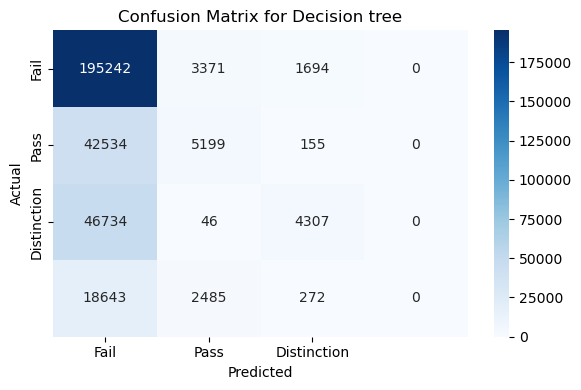

In [126]:
# creating confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = ['Fail', 'Pass', 'Distinction']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix for Decision tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()